# Custom CNN Model

In [ ]:
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("robinreni/signature-verification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/signature-verification-dataset


In [ ]:
# train_path = "/content/drive/MyDrive/archive (1)/sign_data/train"
# test_path = "/content/drive/MyDrive/archive (1)/sign_data/test"

train_path = os.path.join(path, "sign_data/train")
test_path = os.path.join(path, "sign_data/test")

print("Train path:", train_path)
print("Test path:", test_path)

Train path: /kaggle/input/signature-verification-dataset/sign_data/train
Test path: /kaggle/input/signature-verification-dataset/sign_data/test


In [ ]:

# Create directories
os.makedirs("/content/Train/Fake", exist_ok=True)
os.makedirs("/content/Train/Real", exist_ok=True)
os.makedirs("/content/Test/Fake", exist_ok=True)
os.makedirs("/content/Test/Real", exist_ok=True)

In [ ]:

def copy_files(src_dir, dst_dir_fake, dst_dir_real):
    print(f"Checking files in {src_dir}")
    for item in os.listdir(src_dir):
        item_path = os.path.join(src_dir, item)
        if os.path.isfile(item_path):  # Check if it's a regular file
            if item.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check if it's a valid image file
                if item.lower().endswith("_forg.jpg") or item.lower().endswith("_forg.jpeg") or item.lower().endswith("_forg.png"):  # Check if filename ends with "_forg"
                    dst_file = os.path.join(dst_dir_fake, item)
                    print(f"Copying {item_path} to {dst_file}")
                    shutil.copy(item_path, dst_file)
                else:
                    dst_file = os.path.join(dst_dir_real, item)
                    print(f"Copying {item_path} to {dst_file}")
                    shutil.copy(item_path, dst_file)
            else:
                print(f"Skipping {item_path}, not a valid image file")
        elif os.path.isdir(item_path):  # Check if it's a directory
            if item.lower().endswith("_forg"):  # Check if directory name ends with "_forg"
                dst_dir = os.path.join(dst_dir_fake, item)  # Destination directory in the "Fake" folder
                print(f"Copying directory {item_path} to {dst_dir}")
                shutil.copytree(item_path, dst_dir, dirs_exist_ok=True)
            else:
                dst_dir = os.path.join(dst_dir_real, item)  # Destination directory in the "Real" folder
                print(f"Copying directory {item_path} to {dst_dir}")
                shutil.copytree(item_path, dst_dir, dirs_exist_ok=True)
        else:
            print(f"Skipping {item_path}, not a file or directory")

In [ ]:
# Example usage for the training dataset
train_src_dir = train_path
train_dst_dir_fake = "/content/Train/Fake"
train_dst_dir_real = "/content/Train/Real"
# Copy files for training dataset
copy_files(train_src_dir, train_dst_dir_fake, train_dst_dir_real)

Checking files in /kaggle/input/signature-verification-dataset/sign_data/train
Copying directory /kaggle/input/signature-verification-dataset/sign_data/train/034_forg to /content/Train/Fake/034_forg
Copying directory /kaggle/input/signature-verification-dataset/sign_data/train/057 to /content/Train/Real/057
Copying directory /kaggle/input/signature-verification-dataset/sign_data/train/013_forg to /content/Train/Fake/013_forg
Copying directory /kaggle/input/signature-verification-dataset/sign_data/train/061 to /content/Train/Real/061
Copying directory /kaggle/input/signature-verification-dataset/sign_data/train/048 to /content/Train/Real/048
Copying directory /kaggle/input/signature-verification-dataset/sign_data/train/053 to /content/Train/Real/053
Copying directory /kaggle/input/signature-verification-dataset/sign_data/train/051 to /content/Train/Real/051
Copying directory /kaggle/input/signature-verification-dataset/sign_data/train/018 to /content/Train/Real/018
Copying directory /ka

In [ ]:
# Example usage for the testing dataset
test_src_dir = test_path
test_dst_dir_fake = "/content/Test/Fake"
test_dst_dir_real = "/content/Test/Real"

# Copy files for testing dataset
copy_files(test_src_dir, test_dst_dir_fake, test_dst_dir_real)

Checking files in /kaggle/input/signature-verification-dataset/sign_data/test
Copying directory /kaggle/input/signature-verification-dataset/sign_data/test/057 to /content/Test/Real/057
Copying directory /kaggle/input/signature-verification-dataset/sign_data/test/061 to /content/Test/Real/061
Copying directory /kaggle/input/signature-verification-dataset/sign_data/test/053 to /content/Test/Real/053
Copying directory /kaggle/input/signature-verification-dataset/sign_data/test/051 to /content/Test/Real/051
Copying directory /kaggle/input/signature-verification-dataset/sign_data/test/068_forg to /content/Test/Fake/068_forg
Copying directory /kaggle/input/signature-verification-dataset/sign_data/test/056 to /content/Test/Real/056
Copying directory /kaggle/input/signature-verification-dataset/sign_data/test/063_forg to /content/Test/Fake/063_forg
Copying directory /kaggle/input/signature-verification-dataset/sign_data/test/049_forg to /content/Test/Fake/049_forg
Copying directory /kaggle/in

In [ ]:

# Check if directories contain images
train_fake_images = os.listdir("/content/Train/Fake")
train_real_images = os.listdir("/content/Train/Real")
test_fake_images = os.listdir("/content/Test/Fake")
test_real_images = os.listdir("/content/Test/Real")

# Print the contents of each directory
print(f"Total Image data: {len(train_fake_images)} Train/Fake Data: {train_fake_images}")
print(f"Total Image data: {len(train_real_images)} Train/Real Data: {train_real_images}")
print(f"Total Image data: {len(test_fake_images)} Test/Fake Data: {test_fake_images}")
print(f"Total Image data: {len(test_real_images)} Test/Real Data: {test_real_images}")

if len(train_fake_images) == 0 or len(train_real_images) == 0 or len(test_fake_images) == 0 or len(test_real_images) == 0:
    raise ValueError("One of the directories is empty. Please check the paths and ensure images are correctly copied.")

Total Image data: 64 Train/Fake Data: ['004_forg', '030_forg', '068_forg', '053_forg', '027_forg', '014_forg', '037_forg', '059_forg', '043_forg', '033_forg', '062_forg', '044_forg', '040_forg', '020_forg', '028_forg', '050_forg', '016_forg', '029_forg', '023_forg', '015_forg', '051_forg', '031_forg', '045_forg', '032_forg', '025_forg', '058_forg', '013_forg', '054_forg', '035_forg', '046_forg', '047_forg', '066_forg', '056_forg', '063_forg', '039_forg', '041_forg', '022_forg', '042_forg', '006_forg', '018_forg', '024_forg', '009_forg', '052_forg', '001_forg', '002_forg', '049_forg', '021_forg', '036_forg', '067_forg', '060_forg', '019_forg', '017_forg', '026_forg', '048_forg', '065_forg', '064_forg', '003_forg', '061_forg', '034_forg', '057_forg', '055_forg', '069_forg', '038_forg', '012_forg']
Total Image data: 64 Train/Real Data: ['023', '063', '031', '062', '037', '022', '059', '064', '057', '039', '032', '028', '006', '038', '020', '068', '014', '013', '048', '003', '002', '021', 

In [ ]:
train_dir = "/content/Train"
test_dir = "/content/Test"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

# Apply augmentation to the generator
train_generator_augmented = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1649 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


In [ ]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(100, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(130, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(426, activation='relu'),
    Dropout(0.5),
    Dense(300, activation='relu'),  # Adjusted dense layer size
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [ ]:

# Check the number of samples
num_train_samples = train_generator_augmented.samples
num_test_samples = test_generator.samples

# Calculate steps_per_epoch and validation_steps based on the number of samples
steps_per_epoch = num_train_samples // 64
validation_steps = num_test_samples // 64

# Ensure steps_per_epoch and validation_steps are at least 1
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)

print(f'Steps per epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator_augmented,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=2
)

Steps per epoch: 25
Validation steps: 7
Epoch 1/100
25/25 - 18s - 713ms/step - accuracy: 0.5032 - loss: 0.6989 - val_accuracy: 0.5223 - val_loss: 0.6923
Epoch 2/100
25/25 - 6s - 254ms/step - accuracy: 0.5113 - loss: 0.6961 - val_accuracy: 0.6161 - val_loss: 0.6919
Epoch 3/100
25/25 - 1s - 48ms/step - accuracy: 0.4844 - loss: 0.6989 - val_accuracy: 0.6116 - val_loss: 0.6921
Epoch 4/100
25/25 - 10s - 397ms/step - accuracy: 0.5210 - loss: 0.6926 - val_accuracy: 0.5268 - val_loss: 0.6918
Epoch 5/100
25/25 - 10s - 408ms/step - accuracy: 0.5500 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 6/100
25/25 - 1s - 35ms/step - accuracy: 0.5781 - loss: 0.6870 - val_accuracy: 0.5134 - val_loss: 0.6909
Epoch 7/100
25/25 - 41s - 2s/step - accuracy: 0.5299 - loss: 0.6896 - val_accuracy: 0.4821 - val_loss: 0.6932
Epoch 8/100
25/25 - 10s - 408ms/step - accuracy: 0.5337 - loss: 0.6902 - val_accuracy: 0.7366 - val_loss: 0.6824
Epoch 9/100
25/25 - 1s - 36ms/step - accuracy: 0.7031 - loss: 0.

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9532 - loss: 0.0757
Test Accuracy: 96.20%
Test Loss: 7.00%


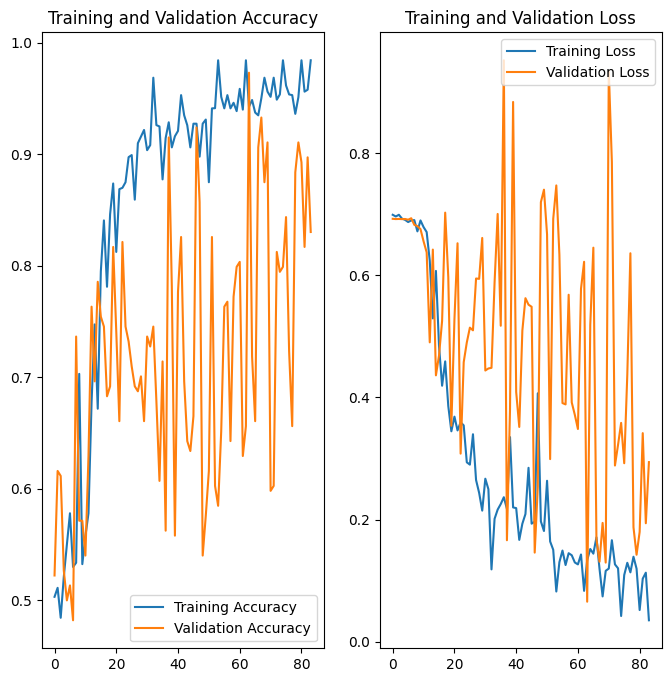

In [ ]:
# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('forg.h5')

In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model('forg.h5')

# Verify the loaded model architecture
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 100)         │          57,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 130)         │         117,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 130)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6370)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       3,261,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 426)                 │         218,538 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 426)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 300)                 │         128,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             301 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,803,115 (14.51 MB)

 Trainable params: 3,803,113 (14.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

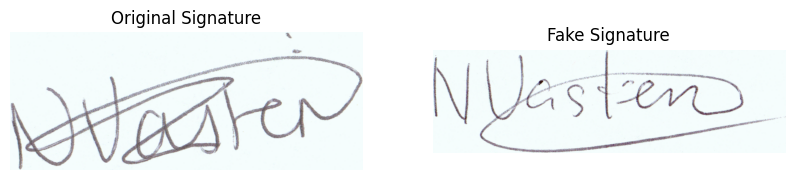

In [ ]:

# Function to display an image
def display_image(image_path, title):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

# Define directories
real_dir = '/content/Train/Real'
fake_dir = '/content/Train/Fake'

# Get the list of original and fake filenames
real_files = [f for f in os.listdir(real_dir) if os.path.isdir(os.path.join(real_dir, f))]
fake_files = [f for f in os.listdir(fake_dir) if f.endswith('_forg') and os.path.isdir(os.path.join(fake_dir, f))]

# Extract base names for matching
real_base_names = set(real_files)
fake_base_names = set(f.split('_forg')[0] for f in fake_files)

# Find common base names
common_names = real_base_names & fake_base_names

if not common_names:
    raise ValueError("No matching original and fake signature pairs found.")

# Randomly select a common name
selected_name = random.choice(list(common_names))

# Get paths for the selected original and fake images
real_image_dir = os.path.join(real_dir, selected_name)
fake_image_dir = os.path.join(fake_dir, selected_name + '_forg')

# Select a random image from each directory
real_image_path = random.choice([os.path.join(real_image_dir, f) for f in os.listdir(real_image_dir) if os.path.isfile(os.path.join(real_image_dir, f))])
fake_image_path = random.choice([os.path.join(fake_image_dir, f) for f in os.listdir(fake_image_dir) if os.path.isfile(os.path.join(fake_image_dir, f))])

# Plot the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
display_image(real_image_path, 'Original Signature')

plt.subplot(1, 2, 2)
display_image(fake_image_path, 'Fake Signature')

plt.show()

In [32]:
# Load the saved model
model = tf.keras.models.load_model('vgg16_model.h5')

# Import the image module from keras.preprocessing
from tensorflow.keras.preprocessing import image

# Function to preprocess the image
def preprocess_image(img_path, target_size=(150, 150)): # Change to the original training input size
    # Check if the provided path is a directory
    if os.path.isdir(img_path):
        # If it's a directory, list the files inside
        files = os.listdir(img_path)
        # Select the first image file (you might want to adjust this based on your directory structure)
        if files:
            img_path = os.path.join(img_path, files[0])
        else:
            raise ValueError("The provided directory is empty.")

    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img_array, img

# Example image path (replace with your actual image path)
img_path = os.path.join(real_image_dir, os.listdir(real_image_dir)[0])
fake_img_path = os.path.join(fake_image_dir, os.listdir(fake_image_dir)[0])
# Preprocess the image
img_array, img = preprocess_image(img_path)
fimg_array, fimg = preprocess_image(fake_img_path)
# Print the shape of the preprocessed image to verify
print(img_array.shape)
print(fimg_array.shape)

# Make predictions
prediction = model.predict(img_array)
fpridiction = model.predict(fimg_array)

# Since it's a binary classification (real or fake), we use a threshold of 0.5
if prediction < 0.5:
    result = "Forged"
else:
    result = "Original"

# Display the image with the classification result
plt.imshow(img)
plt.title(f'{result} Signature.')
plt.axis('off')
plt.show()





NameError: name 'real_image_dir' is not defined

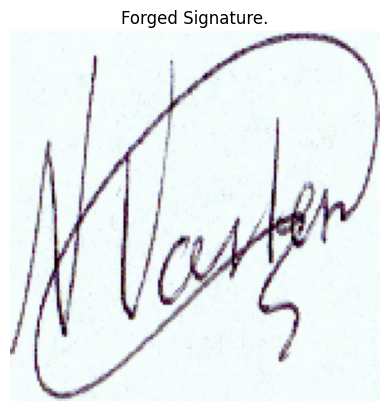

In [ ]:
if fpridiction < 0.5:
    fresult = "Forged"
else:
    fresult = "Original"

plt.imshow(fimg)
plt.title(f'{fresult} Signature.')
plt.axis('off')
plt.show()

# RESNET Model

In [ ]:
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False, input_shape=(64, 64, 3), pooling='avg', weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(435, activation='relu'))
resnet_model.add(Dense(365, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Define the generators with the correct target size
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_dir = '/content/Train'
test_dir = '/content/Test'

train_generator_augmented = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=64,
    class_mode='binary'
)

# Calculate steps_per_epoch and validation_steps based on the size of your dataset
steps_per_epoch = train_generator_augmented.samples // train_generator_augmented.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

# Ensure steps_per_epoch and validation_steps are at least 1
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Train the model
history = resnet_model.fit(
    train_generator_augmented,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=2
)

Found 1649 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
25/25 - 28s - 1s/step - accuracy: 0.5672 - loss: 0.6943 - val_accuracy: 0.6116 - val_loss: 0.6613
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


25/25 - 2s - 61ms/step - accuracy: 0.6719 - loss: 0.6397 - val_accuracy: 0.6138 - val_loss: 0.6573
Epoch 3/100
25/25 - 41s - 2s/step - accuracy: 0.5944 - loss: 0.6617 - val_accuracy: 0.5826 - val_loss: 0.6656
Epoch 4/100
25/25 - 3s - 110ms/step - accuracy: 0.5918 - loss: 0.6450 - val_accuracy: 0.6585 - val_loss: 0.6420
Epoch 5/100
25/25 - 22s - 892ms/step - accuracy: 0.5987 - loss: 0.6538 - val_accuracy: 0.5603 - val_loss: 0.6828
Epoch 6/100
25/25 - 2s - 100ms/step - accuracy: 0.5469 - loss: 0.7042 - val_accuracy: 0.5491 - val_loss: 0.6846
Epoch 7/100
25/25 - 8s - 306ms/step - accuracy: 0.6189 - loss: 0.6424 - val_accuracy: 0.5714 - val_loss: 0.6676
Epoch 8/100
25/25 - 3s - 100ms/step - accuracy: 0.6562 - loss: 0.6228 - val_accuracy: 0.5714 - val_loss: 0.6674
Epoch 9/100
25/25 - 7s - 263ms/step - accuracy: 0.6271 - loss: 0.6404 - val_accuracy: 0.6964 - val_loss: 0.5926
Epoch 10/100
25/25 - 2s - 62ms/step - accuracy: 0.6094 - loss: 0.6468 - val_accuracy: 0.6942 - val_loss: 0.5900
Epoch 

In [ ]:
loss, accuracy = resnet_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 597ms/step - accuracy: 0.8074 - loss: 0.4381
Test Accuracy: 79.80%
Test Loss: 43.83%


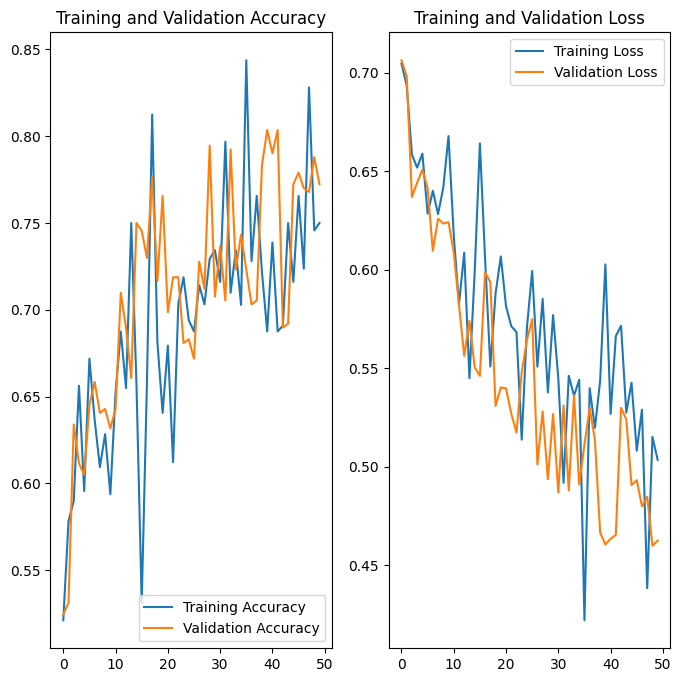

In [ ]:
# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save the resnet model
resnet_model.save('resnet_model.h5')

In [ ]:

resnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 435)                 │         223,155 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 365)                 │         159,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             366 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,882,961 (106.37 MB)

 Trainable params: 1,431,749 (5.46 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,863,500 (10.92 MB)

#  VGG16 model

In [ ]:
# Define the VGG16 model
vgg16_model = Sequential()
pretrained_vgg16 = tf.keras.applications.VGG16(include_top=False, input_shape=(64, 64, 3), pooling='avg', weights='imagenet')

train_dir = '/content/Train'
test_dir = '/content/Test'

for layer in pretrained_vgg16.layers:
    layer.trainable = False

vgg16_model.add(pretrained_vgg16)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(450, activation='relu'))
vgg16_model.add(Dense(260, activation='relu'))
vgg16_model.add(Dense(1, activation='sigmoid'))
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the generators with the correct target size
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator_augmented = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=64,
    class_mode='binary'
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Found 1649 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Calculate steps_per_epoch and validation_steps based on the size of your dataset
steps_per_epoch = train_generator_augmented.samples // train_generator_augmented.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

# Ensure steps_per_epoch and validation_steps are at least 1
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the VGG16 model
history_vgg16 = vgg16_model.fit(
    train_generator_augmented,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/100
25/25 - 16s - 629ms/step - accuracy: 0.5293 - loss: 0.7271 - val_accuracy: 0.6942 - val_loss: 0.6380
Epoch 2/100
25/25 - 2s - 79ms/step - accuracy: 0.6719 - loss: 0.6377 - val_accuracy: 0.6942 - val_loss: 0.6291
Epoch 3/100
25/25 - 10s - 388ms/step - accuracy: 0.6808 - loss: 0.5896 - val_accuracy: 0.6942 - val_loss: 0.5754
Epoch 4/100
25/25 - 2s - 67ms/step - accuracy: 0.7188 - loss: 0.5501 - val_accuracy: 0.7254 - val_loss: 0.5425
Epoch 5/100
25/25 - 20s - 810ms/step - accuracy: 0.7451 - loss: 0.5096 - val_accuracy: 0.7165 - val_loss: 0.5571
Epoch 6/100
25/25 - 1s - 60ms/step - accuracy: 0.6562 - loss: 0.6047 - val_accuracy: 0.7991 - val_loss: 0.4597
Epoch 7/100
25/25 - 6s - 256ms/step - accuracy: 0.7779 - loss: 0.4663 - val_accuracy: 0.8170 - val_loss: 0.4101
Epoch 8/100
25/25 - 1s - 60ms/step - accuracy: 0.7656 - loss: 0.5018 - val_accuracy: 0.8237 - val_loss: 0.4019
Epoch 9/100
25/25 - 10s - 409ms/step - accuracy: 0.8120 - loss: 0.4148 - val_accuracy: 0.7545 - val_loss:

In [ ]:
loss, accuracy = vgg16_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 585ms/step - accuracy: 1.0000 - loss: 0.0079
Test Accuracy: 100.00%
Test Loss: 0.84%


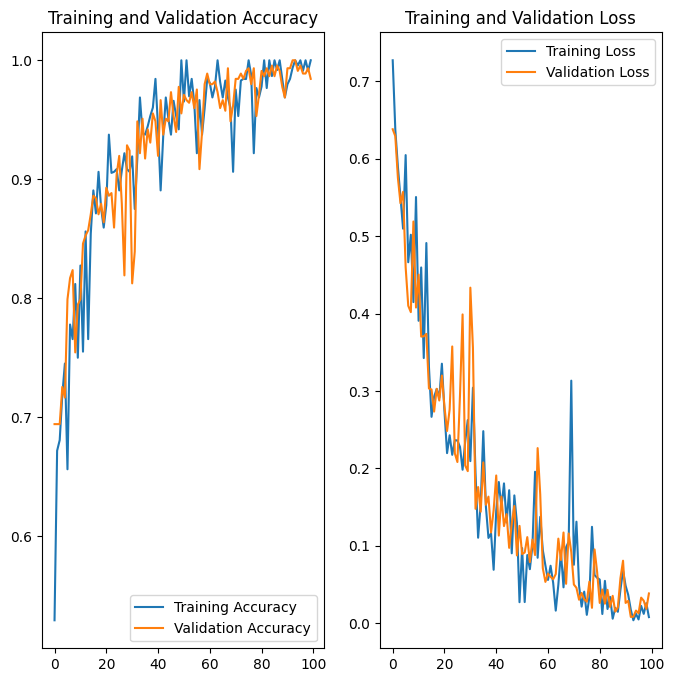

In [ ]:

# Plot training and validation accuracy
acc = history_vgg16.history['accuracy']
val_acc = history_vgg16.history['val_accuracy']
loss = history_vgg16.history['loss']
val_loss = history_vgg16.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save the VGG16 model
vgg16_model.save('vgg16_model.h5')

In [ ]:
vgg16_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 450)            │       230,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 260)            │       117,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           261 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,547,771 (63.12 MB)

 Trainable params: 611,027 (2.33 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,222,056 (4.66 MB)

# VGG19 model

In [ ]:

# Define the VGG19 model
vgg19_model = Sequential()
pretrained_vgg19 = tf.keras.applications.VGG19(include_top=False, input_shape=(64, 64, 3), pooling='avg', weights='imagenet')

for layer in pretrained_vgg19.layers:
    layer.trainable = False

vgg19_model.add(pretrained_vgg19)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(512, activation='relu'))
vgg19_model.add(Dense(455, activation='relu'))
vgg19_model.add(Dense(250, activation='relu'))
vgg19_model.add(Dense(1, activation='sigmoid'))
vgg19_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the generators with the correct target size
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator_augmented = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=64,
    class_mode='binary'
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Found 1649 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Calculate steps_per_epoch and validation_steps based on the size of your dataset
steps_per_epoch = train_generator_augmented.samples // train_generator_augmented.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

# Ensure steps_per_epoch and validation_steps are at least 1
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# Train the VGG19 model
history_vgg19 = vgg19_model.fit(
    train_generator_augmented,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/100
25/25 - 12s - 479ms/step - accuracy: 0.5937 - loss: 0.6955 - val_accuracy: 0.7656 - val_loss: 0.5695
Epoch 2/100
25/25 - 2s - 82ms/step - accuracy: 0.7344 - loss: 0.5544 - val_accuracy: 0.7232 - val_loss: 0.5714
Epoch 3/100
25/25 - 10s - 407ms/step - accuracy: 0.6921 - loss: 0.5667 - val_accuracy: 0.6875 - val_loss: 0.5861
Epoch 4/100
25/25 - 2s - 74ms/step - accuracy: 0.7812 - loss: 0.4963 - val_accuracy: 0.6585 - val_loss: 0.6250
Epoch 5/100
25/25 - 15s - 600ms/step - accuracy: 0.7527 - loss: 0.5137 - val_accuracy: 0.8125 - val_loss: 0.4259
Epoch 6/100
25/25 - 1s - 59ms/step - accuracy: 0.7656 - loss: 0.4307 - val_accuracy: 0.8259 - val_loss: 0.4233
Epoch 7/100
25/25 - 10s - 409ms/step - accuracy: 0.7691 - loss: 0.4616 - val_accuracy: 0.8214 - val_loss: 0.4105
Epoch 8/100
25/25 - 1s - 59ms/step - accuracy: 0.8125 - loss: 0.3950 - val_accuracy: 0.8103 - val_loss: 0.4236
Epoch 9/100
25/25 - 10s - 410ms/step - accuracy: 0.8107 - loss: 0.4070 - val_accuracy: 0.8549 - val_loss

In [ ]:

loss, accuracy = vgg19_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - accuracy: 0.9961 - loss: 0.0310
Test Accuracy: 99.60%
Test Loss: 2.76%


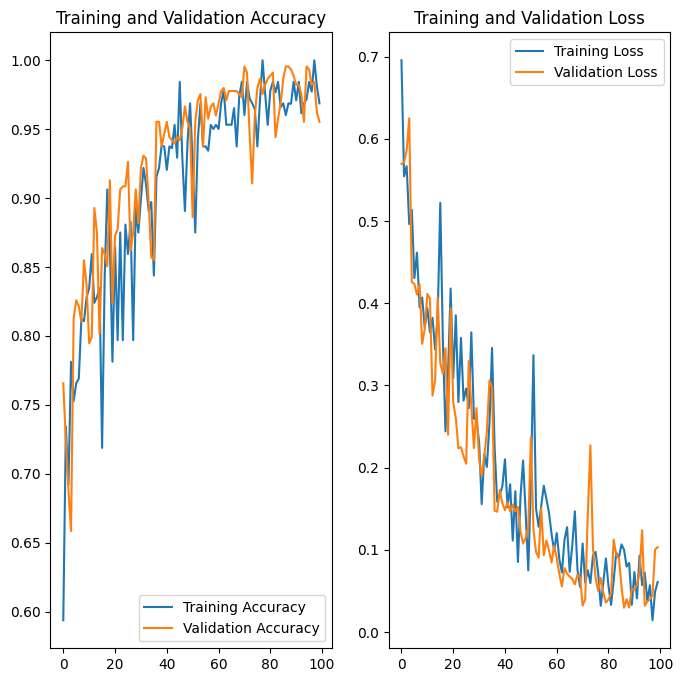

In [ ]:
# Plot training and validation accuracy
acc = history_vgg19.history['accuracy']
val_acc = history_vgg19.history['val_accuracy']
loss = history_vgg19.history['loss']
val_loss = history_vgg19.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Save the VGG19 model
vgg19_model.save('vgg19_model.h5')

In [ ]:
vgg19_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 512)            │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 455)            │       233,415 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 250)            │       114,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,855,352 (83.37 MB)

 Trainable params: 610,322 (2.33 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 1,220,646 (4.66 MB)